# LSTM MEMORY CALCULATE

In [13]:
#parameters
input_size = 100  
hidden_size = 256  
batch_size = 64 
sequence_length = 50  


In [14]:


num_params = (4 * input_size * hidden_size) + (4 * hidden_size * hidden_size) + (4 * hidden_size)


intermediate_memory_per_timestep = 2 * hidden_size * batch_size  
intermediate_memory_total = intermediate_memory_per_timestep * sequence_length  


###
memory_weights = num_params * 4 
memory_intermediate = intermediate_memory_total * 4  
total_memory = memory_weights + memory_intermediate  

print("memory_weights", memory_weights,"memory_intermediate", memory_intermediate,"total_memory", total_memory)  # Display each memory usage in bytes


memory_weights 1462272 memory_intermediate 6553600 total_memory 8015872


# TRANSFORMERS MEMORY CALCULATE

In [15]:
#parameters
d_model = 512
n_layers = 6 
batch_size = 64 
sequence_length = 50 
vocab_size = 10000 

In [16]:

embedding_params = vocab_size * d_model
attention_params_per_layer = 3 * d_model * d_model  # Q, K, V matrices
attention_params_total = attention_params_per_layer * n_layers


ffn_params_per_layer = 2 * d_model * d_model  
ffn_params_total = ffn_params_per_layer * n_layers


total_model_params = embedding_params + attention_params_total + ffn_params_total

intermediate_values_per_layer = 2 * d_model * sequence_length * batch_size  
intermediate_values_total = intermediate_values_per_layer * n_layers


memory_model_params = total_model_params * 4  
memory_intermediate_values = intermediate_values_total * 4  
total_memory = memory_model_params + memory_intermediate_values  

print("memory_model_params",memory_model_params ," memory_intermediate_values", memory_intermediate_values, "total_memory", total_memory) 

memory_model_params 51937280  memory_intermediate_values 78643200 total_memory 130580480


LSTM VS LINEAR TRANSFORMER 메모리 사용량 시각화

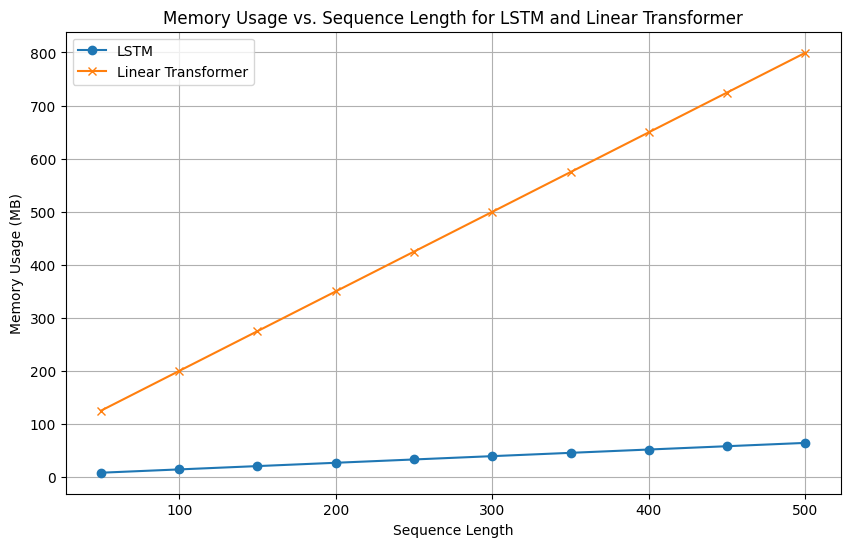

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_lstm_memory(sequence_length, input_size=100, hidden_size=256, batch_size=64):

    num_params = (4 * input_size * hidden_size) + (4 * hidden_size * hidden_size) + (4 * hidden_size)

    
    intermediate_memory_per_timestep = 2 * hidden_size * batch_size  
    intermediate_memory_total = intermediate_memory_per_timestep * sequence_length  

   
    memory_weights = num_params * 4
    memory_intermediate = intermediate_memory_total * 4
    total_memory = memory_weights + memory_intermediate
    return total_memory / (1024 ** 2)  

def calculate_linear_transformer_memory(sequence_length, d_model=512, n_layers=6, batch_size=64, vocab_size=10000):
    
    embedding_params = vocab_size * d_model
    attention_params_per_layer = 3 * d_model * d_model  
    attention_params_total = attention_params_per_layer * n_layers
    ffn_params_per_layer = 2 * d_model * d_model  
    ffn_params_total = ffn_params_per_layer * n_layers
    total_model_params = embedding_params + attention_params_total + ffn_params_total

    
    intermediate_values_per_layer = 2 * d_model * sequence_length * batch_size  
    intermediate_values_total = intermediate_values_per_layer * n_layers

    
    memory_model_params = total_model_params * 4
    memory_intermediate_values = intermediate_values_total * 4
    total_memory = memory_model_params + memory_intermediate_values
    return total_memory / (1024 ** 2)  


sequence_lengths = np.arange(50, 501, 50)  


lstm_memory = [calculate_lstm_memory(seq_len) for seq_len in sequence_lengths]
linear_transformer_memory = [calculate_linear_transformer_memory(seq_len) for seq_len in sequence_lengths]


plt.figure(figsize=(10, 6))
plt.plot(sequence_lengths, lstm_memory, label='LSTM', marker='o')
plt.plot(sequence_lengths, linear_transformer_memory, label='Linear Transformer', marker='x')
plt.xlabel('Sequence Length')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage vs. Sequence Length for LSTM and Linear Transformer')
plt.legend()
plt.grid(True)
plt.show()

LSTM VS LINEAR TRANSFORMER 컴퓨테이션 용량 시각화

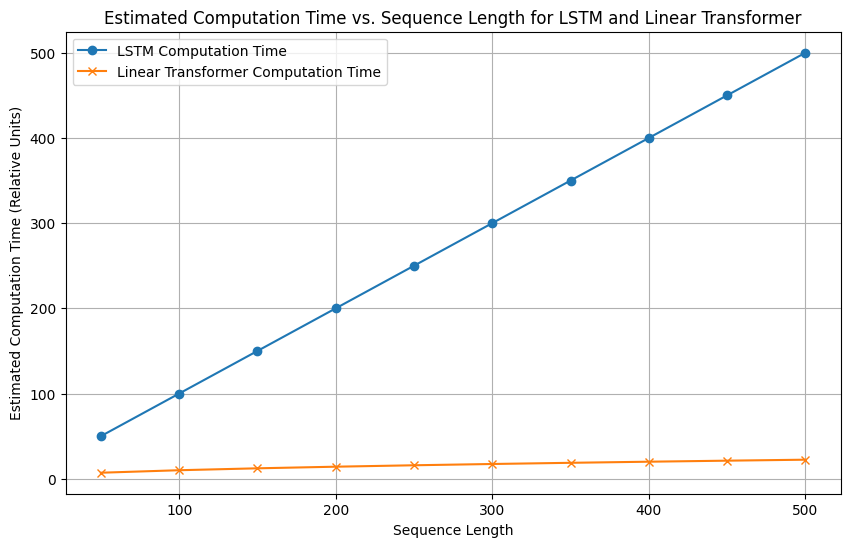

In [19]:

def estimate_computation_time(model_type, sequence_length):
    
    if model_type == 'LSTM':
       
        return sequence_length
    elif model_type == 'LinearTransformer':
        
        return np.sqrt(sequence_length)
    else:
        return 0


lstm_computation_time = [estimate_computation_time('LSTM', seq_len) for seq_len in sequence_lengths]
linear_transformer_computation_time = [estimate_computation_time('LinearTransformer', seq_len) for seq_len in sequence_lengths]


plt.figure(figsize=(10, 6))
plt.plot(sequence_lengths, lstm_computation_time, label='LSTM Computation Time', marker='o')
plt.plot(sequence_lengths, linear_transformer_computation_time, label='Linear Transformer Computation Time', marker='x')
plt.xlabel('Sequence Length')
plt.ylabel('Estimated Computation Time (Relative Units)')
plt.title('Estimated Computation Time vs. Sequence Length for LSTM and Linear Transformer')
plt.legend()
plt.grid(True)
plt.show()

데이터가 순차적으로 추가되는 구조의 계산시간과 메모리

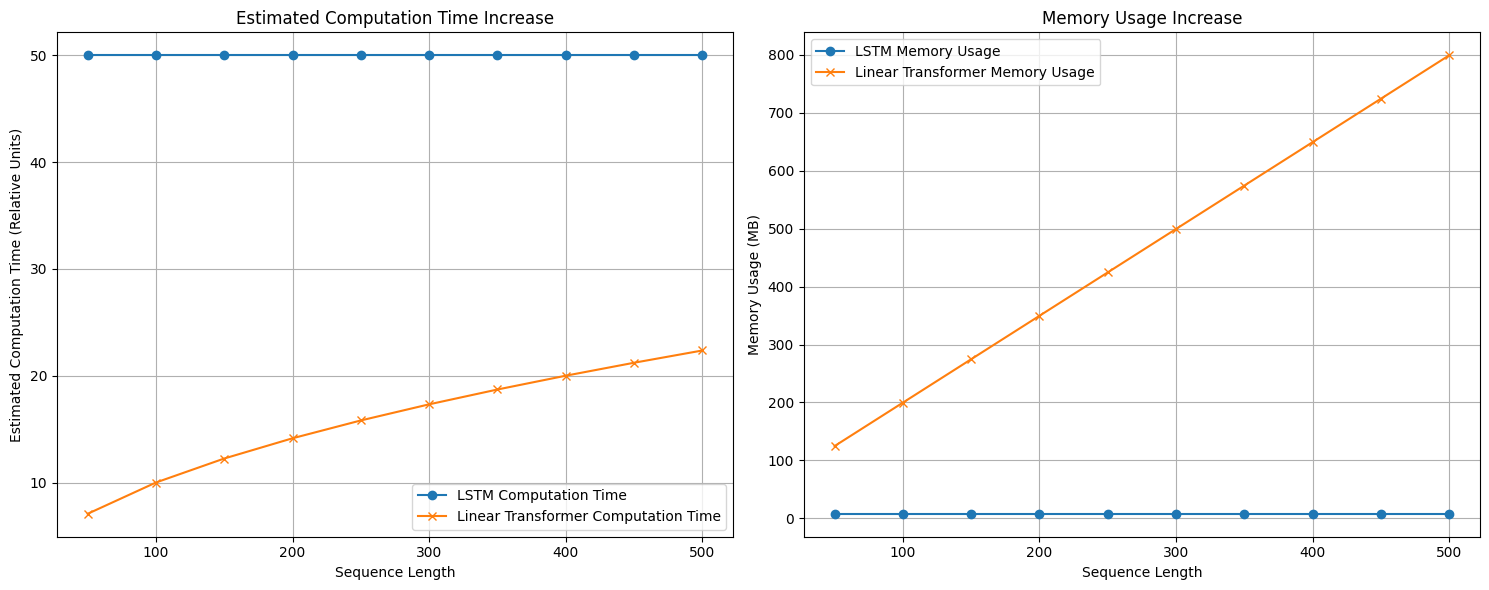

In [20]:

lstm_computation_increase = [estimate_computation_time('LSTM', 50)] * len(sequence_lengths)
lstm_memory_increase = [calculate_lstm_memory(50)] * len(sequence_lengths)


linear_transformer_computation_increase = [estimate_computation_time('LinearTransformer', seq_len) for seq_len in sequence_lengths]
linear_transformer_memory_increase = [calculate_linear_transformer_memory(seq_len) for seq_len in sequence_lengths]

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(sequence_lengths, lstm_computation_increase, label='LSTM Computation Time', marker='o')
plt.plot(sequence_lengths, linear_transformer_computation_increase, label='Linear Transformer Computation Time', marker='x')
plt.xlabel('Sequence Length')
plt.ylabel('Estimated Computation Time (Relative Units)')
plt.title('Estimated Computation Time Increase')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(sequence_lengths, lstm_memory_increase, label='LSTM Memory Usage', marker='o')
plt.plot(sequence_lengths, linear_transformer_memory_increase, label='Linear Transformer Memory Usage', marker='x')
plt.xlabel('Sequence Length')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage Increase')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
